## Practica Nº3. Formación en Modelos Predictivos (I) ##
(Primer planteamiento)

**Introducción**

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo y
se cobran aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de
todas las muertes en todo el mundo.
La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos
contiene 12 características que pueden usarse para predecir la mortalidad por insuficiencia
cardíaca.

La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores
de riesgo conductuales, como el tabaquismo, la dieta poco saludable y la obesidad, la
inactividad física y el consumo nocivo de alcohol, mediante estrategias que abarquen a toda la
población.

Las personas con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular
(por la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia
o enfermedad ya establecida) necesitan una detección y manejo temprano en el que un
modelo de aprendizaje automático puede ser de gran ayuda.

Se nos ha encargado crear un modelo predictivo para conocer si una persona podrá sufrir una
ECV, y estimar el plazo de tiempo en que podría ocurrirle.
Hemos recibido el dataset que verás a continuación, en formato CSV, para realizar el ejercicio.
Acceso al dataset: https://apioverstand.es/training/dataset_heart.zip

**Descripcion de las columnas**

* age: Edad del paciente (40-95)
* anaemia: Paciente con anemia. 1:SI, 0:NO
* creatinine_phosphokinase: Nivel de la enzima CPK en la sangre (mcg/L) [23, ..., 7861]
* diabetes: Paciente diabetico. 1:SI, 0:NO
* ejection_fraction: Porcentaje de perdida de sangre (Porcentaje) [14, ..., 80]
* high_blood_pressure: Presion arterial alta. 1:SI, 0:NO
* platelets: Plaquetas en sangre kiloplaquetas/ml [25,01, ..., 850,00]
* serum_creatinine: Nivel de creatinina en sangre mg/dL [0,50, ..., 9,40]
* serum_sodium: Nivel de sodio en sangre mEq/L [114, ..., 148]
* sex: Hombre: 1. Mujer: 0. 
* smoking: Fumador: 1. No fumador: 0
* time: Periodo de seguimiento Días [4,...,285] **[2ª variable objetivo]**
* DEATH_EVENT: Fallecido: 1. Sano: 0 **[1ª variable objetivo]**

**PASO 1. ANALISIS DE LOS DATOS**

**1.1. Importar librerias**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**1.2. Importar dataset**

In [2]:
path = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(path)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**1.3. Informacion del dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


**PASO 2. PREPARACION DE LOS DATOS**

**2.1. Valores unicos en cada columna**

In [4]:
for col in df.columns:
    print(f'{col}, {len(df[col].unique())}')

age, 46
anaemia, 2
creatinine_phosphokinase, 208
diabetes, 2
ejection_fraction, 17
high_blood_pressure, 2
platelets, 176
serum_creatinine, 40
serum_sodium, 27
sex, 2
smoking, 2
time, 148
DEATH_EVENT, 2


**2.2. SEPARACION DE COLUMNAS SEGUN EL TIPO DE DATOS (NUMERICOS O CATEGORICOS)**

In [5]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

**2.3. Valores minimos, medios y maximos de las columnas numericas**

In [6]:
df[num_cols].describe().T[['min', '50%','max']].rename(columns={'50%':'avg'})

,min,avg,max
age,40.0,60.0,95.0
creatinine_phosphokinase,23.0,250.0,7861.0
ejection_fraction,14.0,38.0,80.0
platelets,25100.0,262000.0,850000.0
serum_creatinine,0.5,1.1,9.4
serum_sodium,113.0,137.0,148.0
time,4.0,115.0,285.0


**PASO 3. ANALISIS EXPLORATORIO DE DATOS**

**3.1. Distribucion de las caracteristicas mas influyentes sobre la variable objetivo (DEATH_EVENT)**

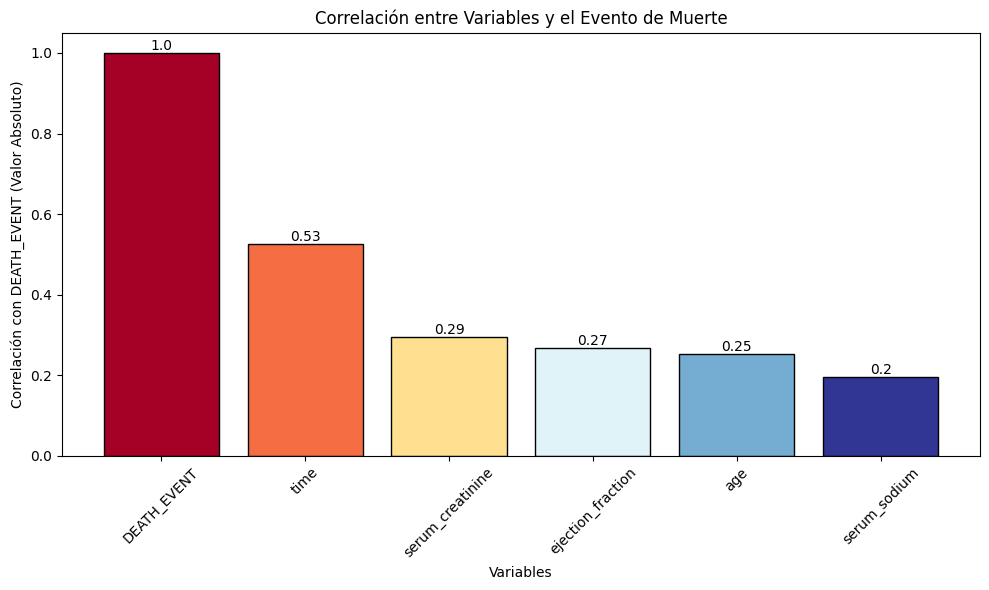

In [7]:
# Calcula la correlación entre las variables y el evento de muerte
corr = df.corr()['DEATH_EVENT'].abs().sort_values(ascending=False)

# Filtra las variables que tienen una correlación mayor a 0.1 (puedes ajustar este umbral)
relevant_variables = corr[corr > 0.1]

# Ordena las variables por correlación en orden descendente
relevant_variables = relevant_variables.sort_values(ascending=False)

# Define un mapa de color que vaya de azul (0) a rojo (1) basado en los valores de correlación
color_map = plt.cm.RdYlBu(np.linspace(0, 1, len(relevant_variables)))

# Crea una gráfica de barras con colores basados en el mapa de color
plt.figure(figsize=(10, 6))
bars = plt.bar(relevant_variables.index, relevant_variables.values, color=color_map, edgecolor='black')
plt.xlabel('Variables')
plt.ylabel('Correlación con DEATH_EVENT (Valor Absoluto)')
plt.title('Correlación entre Variables y el Evento de Muerte')

# Agrega el índice de cada variable en medio de sus respectivas barras en color negro
for bar, color in zip(bars, color_map):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [8]:
# Igual al anterior en formato texto
corr = df.corr()
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT'].sort_values()

time                -0.526964
ejection_fraction   -0.268603
serum_sodium        -0.195204
age                  0.253581
serum_creatinine     0.294278
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

**3.2. ELIMINAR LAS COLUMNAS MENOS RELEVANTES**

In [9]:
# Eliminamos columnas que menos relacion tienen con la variable objetivo.
# Recorremos el bucle para eliminar de ambas listas, tanto categoricas como numericas
rem_cols = ['platelets', 'smoking', 'sex', 'diabetes']

for e in rem_cols:
    if df[e].nunique()>5:
        num_cols.remove(e)
    else:
        cat_cols.remove(e)
        
df = df.drop(rem_cols, axis=1)

print("Categorical: ",cat_cols)
print("Numurical: ",num_cols)

Categorical:  ['anaemia', 'high_blood_pressure', 'DEATH_EVENT']
Numurical:  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']


**3.3. COPIA DEL DATAFRAME ORIGINAL**

In [10]:
# Despues de eliminar las columnas menos relevantes y antes de normalizar los datos
# hacemos copia del df porque la vamos a necesitar mas adelante para estimar la variable tiempo
df_reducido = df
df_reducido

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75,0,582,20,1,1.9,130,4,1
1,55,0,7861,38,0,1.1,136,6,1
2,65,0,146,20,0,1.3,129,7,1
3,50,1,111,20,0,1.9,137,7,1
4,65,1,160,20,0,2.7,116,8,1
...,...,...,...,...,...,...,...,...,...
294,62,0,61,38,1,1.1,143,270,0
295,55,0,1820,38,0,1.2,139,271,0
296,45,0,2060,60,0,0.8,138,278,0
297,45,0,2413,38,0,1.4,140,280,0


**PASO 4. PRE-PROCESAMIENTO DE LOS DATOS**

**4.1. Escalado de caracteristicas**

In [11]:
# Transformamos las escalas de caracteristicas de las columnas numericas
# en el rango entre -1 y +1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # scaling in range [-1, 1]
standard_df = scaler.fit_transform(df[num_cols])
standard_df = pd.DataFrame(standard_df, columns=num_cols)
standard_df.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
0,1.193302,0.000166,-1.530560,0.490057,-1.504036,-1.629502
1,-0.490896,7.514640,-0.007077,-0.284552,-0.141976,-1.603691
2,0.351203,-0.449939,-1.530560,-0.090900,-1.731046,-1.590785
3,-0.911945,-0.486071,-1.530560,0.490057,0.085034,-1.590785
4,0.351203,-0.435486,-1.530560,1.264666,-4.682176,-1.577879


**4.2. Union de las columnas categoricas con las numericas en un solo dataframe**

In [12]:
df = standard_df.join(df[cat_cols])
df.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,DEATH_EVENT
0,1.193302,0.000166,-1.530560,0.490057,-1.504036,-1.629502,0,1,1
1,-0.490896,7.514640,-0.007077,-0.284552,-0.141976,-1.603691,0,0,1
2,0.351203,-0.449939,-1.530560,-0.090900,-1.731046,-1.590785,0,0,1
3,-0.911945,-0.486071,-1.530560,0.490057,0.085034,-1.590785,1,0,1
4,0.351203,-0.435486,-1.530560,1.264666,-4.682176,-1.577879,1,0,1


In [13]:
# Reordenacion de las columnas en el orden original
df = df[['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']]
df

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,1.193302,0,0.000166,-1.530560,1,0.490057,-1.504036,-1.629502,1
1,-0.490896,0,7.514640,-0.007077,0,-0.284552,-0.141976,-1.603691,1
2,0.351203,0,-0.449939,-1.530560,0,-0.090900,-1.731046,-1.590785,1
3,-0.911945,1,-0.486071,-1.530560,0,0.490057,0.085034,-1.590785,1
4,0.351203,1,-0.435486,-1.530560,0,1.264666,-4.682176,-1.577879,1
...,...,...,...,...,...,...,...,...,...
294,0.098573,0,-0.537688,-0.007077,1,-0.284552,1.447094,1.803451,0
295,-0.490896,0,1.278215,-0.007077,0,-0.187726,0.539054,1.816357,0
296,-1.332995,0,1.525979,1.854958,0,-0.575031,0.312044,1.906697,0
297,-1.332995,0,1.890398,-0.007077,0,0.005926,0.766064,1.932509,0


**4.3. Separacion de caracteristicas de la variable objetivo**

In [14]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

**PASO 5. SELECCION DEL MODELO**
(*LogisticRegression*)

**5.1. Obtener el mejor valor para random_state a la hora de hacer la division de los datos**

In [15]:
# Este código busca la semilla random_state que produce el mejor rendimiento del modelo de 
# regresión logística en los datos de prueba. Esto puede ayudar a asegurarse de que la división 
# de datos sea consistente en futuras ejecuciones del código y que el modelo se entrene y evalúe 
# de manera más confiable.
the_best_seed = {}

for i in range(45):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    mdl = LogisticRegression()
    mdl.fit(x_train,y_train)
    the_best_seed[mdl.score(x_test, y_test)] = i
    
max_score = max(the_best_seed.keys())
max_seed = the_best_seed[max_score]

print("BEST SEED:", max_seed)

BEST SEED: 24


**5.3. Division de los datos. 80% para entrenamiento y 20% para test**

In [16]:
# Aqui usaremos la variable random_state calculada anteriormente
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=max_seed) # max_seed = 24

In [17]:
# Visualizamos los primeros elementos de entrenamiento (x_train) incluyendo la variable objetivo (y_train)
x_train.merge(y_train,left_index=True,right_index=True).head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
176,0.688043,0,0.864242,0.162199,0,-0.381379,-0.368986,0.216033,0
244,-0.575106,0,0.000166,-0.007077,0,0.393231,-0.595996,1.067818,0
187,-0.069846,0,1.356673,-1.107370,0,0.683709,1.674104,0.538678,1
172,0.772253,1,-0.424130,1.854958,1,-0.284552,1.901114,0.203127,0
211,-0.911945,0,0.000166,2.024234,1,-0.575031,0.766064,0.796795,0


In [18]:
# IDEM al anterior pero con los elementos de test
x_test.merge(y_test,left_index=True,right_index=True).head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
179,-0.490896,0,0.261350,0.162199,0,-0.671857,0.766064,0.216033,0
196,-1.332995,0,0.000166,-0.007077,1,-0.207091,0.085034,0.706454,0
108,0.182783,0,0.365618,-0.007077,0,-0.284552,-0.823006,-0.545412,0
65,-0.069846,0,-0.530462,-1.530560,0,1.458319,-2.185066,-0.855152,1
183,1.193302,0,-0.498459,-0.007077,1,1.071014,-0.595996,0.409620,1


**5.4. Ajuste de Hiperparametros**

In [19]:
# Obtener los mejores valores para 'C'y para 'max_iter'
parameters = {'max_iter':[100, 200, 500], 'C':[1,2,5]}
lr = LogisticRegression()
mdl = GridSearchCV(lr, parameters)
mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)
mdl.best_params_

{'C': 2, 'max_iter': 100}

**PASO 6. VALIDACION**

**6.1. Matriz de confusion**

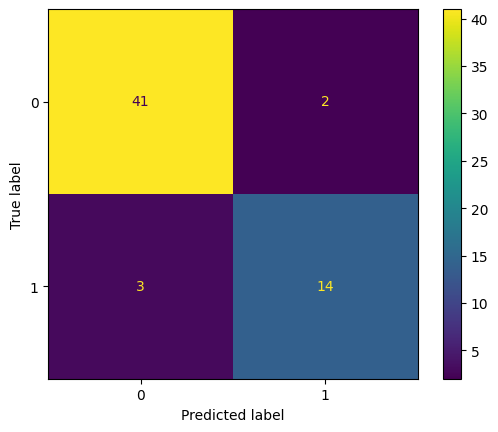

In [20]:
# -Esquina superior izquierda: Verdaderos Positivos
# -Esquina inferior izquierda: Falsos Negativos
# -Esquina superior derecha: Falsos Positivos
# -Esquina inferior derecha: Verdaderos Negativos
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**6.2. Precision del modelo**

In [21]:
precision = accuracy_score(y_test, y_pred)*100
precision = round(precision, 2)
print(f'La precision del modelo de Regresion Logistica es del {precision}%')

La precision del modelo de Regresion Logistica es del 91.67%


**6.3. Reporte de clasificacion**

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



**PASO 7. EVALUACION DEL MODELO**

In [23]:
# DATOS DE NUESTRO PACIENTE:
# 1. Age of the patient (Years) [40, ..., 95]
# 2. anaemia = # Decrease of red blood cells or hemoglobin (Boolean) 0, 1
# 3. creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L) [23, ..., 7861]
# 4. ejection_fraction = # Percentage of blood leaving (Percentage) [14, ..., 80]
# 5. high_blood_pressure = # If a patient has hypertension (Boolean) 0, 1
# 6. serum_creatinine = # Level of creatinine in the blood (mg/dL) [0.50, ..., 9.40]
# 7. serum_sodium = # Level of sodium in the blood (mEq/L) [114, ..., 148]
# 8. time = # Follow-up period (Days) [4,...,285]

lr = LogisticRegression(max_iter=100, C=2) 
lr.fit(x_train, y_train)

# Aqui se han tomado 4 registros aleatorios de ejemplo con datos reales para
# comprobar que el resultado coincide con el dataset original
datos_paciente_2 = [[75,0,582,20,1,1.9,130,4]] # Registro 2 en el dataset original. Dato real: 1.Prediccion: 1
datos_paciente_16 = [[49,1,80,30,1,1,138,12]] # Registro 16. Dato real: 0. Prediccion: 0
datos_paciente_154 = [[50,0,115,45,1,0.9,134,118]] # Registro 154. Dato real: 0. Prediccion: 0
datos_paciente_50 = [[80,1,553,20,1,4.4,133,41]] # Registro . Dato real: 1. Prediccion: 1

# Seleccionamos cualquiera de los ejemplos anteriores
# paciente_a_evaluar = datos_paciente_154
paciente_a_evaluar = [[78,1,500,19,1,4.9,134,36]] # Datos inventados

predictions = lr.predict(paciente_a_evaluar)
print(predictions)
if predictions[0]==1:
    print('Paciente fallecido')
else:
    print('Paciente sano')

[1]
Paciente fallecido


**PASO 8. ESTIMACION DE TIEMPO APROXIMADA EN QUE SE PRODUCIRA EL EVENTO MUERTE**

In [24]:
# Para estimar el tiempo, vamos a comparar datos del paciente en prueba
# con todos los pacientes fallecidos. Y vamos a ver que porcentajes de similitud obtenemos.
# Primero crearemos un df con solo fallecidos usando el df despues de eliminar las columnas
# menos relevantes y antes de normalizar (df_reducido)
df_fallecidos = df_reducido[df_reducido['DEATH_EVENT'] == 1].reset_index(drop=True)
# Eliminamos la columna DEATH_EVENT de este df ya que aqui todos la tienen a 1
df_fallecidos = df_fallecidos.drop('DEATH_EVENT', axis=1)

In [25]:
# Funcion para extraer en forma de lista los datos de un paciente determinado
# dentro de la lista de fallecidos
def datos_paciente(registro):
    # Convierte el registro en una lista     
    registro_lista = df_fallecidos.iloc[registro].values.tolist()       
    return registro_lista

datos_paciente_x = datos_paciente(26)
print(datos_paciente_x)

[82.0, 0.0, 70.0, 30.0, 0.0, 1.2, 132.0, 26.0]


**PASO 9. ESTIMACION DE TIEMPO EN QUE PODRIA PRODUCIRSE UNA ECV (Enfermedad Cardio-Vascular)**

In [26]:
# Lista para almacenar los coeficientes de similitud coseno
similitudes = []

# Calcular la similitud coseno entre el paciente en evaluación y todos los pacientes en df_fallecidos
for i in range(len(df_fallecidos)):
    paciente_fallecido = datos_paciente(i)
    paciente_fallecido = [paciente_fallecido]

    # Convertir los datos a un formato adecuado para calcular la similitud coseno
    datos = paciente_a_evaluar + paciente_fallecido    
    datos = np.array(datos)    

    # Calcular la similitud coseno
    similitud = cosine_similarity(datos)

    # Almacenar el coeficiente de similitud
    similitudes.append(similitud[0, 1])

# Encontrar el índice del paciente con mayor similitud coseno
indice_max_similitud = np.argmax(similitudes)

# Conversion de indice a porcentaje 
porcentaje_similitud = (similitudes[indice_max_similitud])*100
porcentaje_similitud = round(porcentaje_similitud, 2)

# Imprimir el registro del paciente con mayor similitud
print("El paciente más similar es el registro:", indice_max_similitud)
print("Coeficiente de similitud:", porcentaje_similitud, '%')

# Obtiene los datos de la línea que mayor puntaje ha dado
datos_fallecido = df_fallecidos.iloc[indice_max_similitud].tolist()
# Calculo dias
dias = int(datos_fallecido[7])
# Imprime la lista de datos
print('Datos paciente fallecido: ', datos_fallecido)
print('Datos paciente a evaluar: ', paciente_a_evaluar)
print('RESULTADO FINAL: ')
print(f'Tiene un {porcentaje_similitud}% de padecer una ECV en aprox. {dias} dias.')

El paciente más similar es el registro: 42
Coeficiente de similitud: 99.96 %
Datos paciente fallecido:  [80.0, 1.0, 553.0, 20.0, 1.0, 4.4, 133.0, 41.0]
Datos paciente a evaluar:  [[78, 1, 500, 19, 1, 4.9, 134, 36]]
RESULTADO FINAL: 
Tiene un 99.96% de padecer una ECV en aprox. 41 dias.


**ANEXO. CALCULO DEL PORCENTAJE REAL DE ACIERTOS CON EL DATASET ORIGINAL**

In [27]:
# ESTE CODIGO SIRVE PARA COMPROBAR CON TODO EL DATASET
# EN CUANTOS REGISTROS COINCIDE LA PREDICCION CON LOS DATOS REALES
# En este caso 251 aciertos y 48 fallos que es mas o menos el porcentaje de precision del modelo

# Modelo de regresión logística 
lr = LogisticRegression(max_iter=100, C=2)

# Entrenar el modelo
lr.fit(x_train, y_train)

# Listas para los registros que coinciden y no coinciden
registros_coinciden = []
registros_no_coinciden = []

# Recorrer cada fila en el DataFrame df
for index, row in df.iterrows():
    # Seleccionar las características de este paciente (fila)
    paciente_data = row[['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'time']].values.reshape(1, -1)
    
    # Realizar una predicción utilizando el modelo
    prediccion = lr.predict(paciente_data)
    
    # Obtener el valor real de DEATH_EVENT para esta fila
    valor_real = row['DEATH_EVENT']
    
    # Comparar la predicción con el valor real y agregar la fila al resultado correspondiente
    if prediccion == valor_real:
        registros_coinciden.append(index)
    else:
        registros_no_coinciden.append(index)

# Mostrar los resultados
print("Registros que coinciden:", registros_coinciden)
print(len(registros_coinciden))
print("Registros que no coinciden:", registros_no_coinciden)
print(len(registros_no_coinciden))

# Calcular la precisión del modelo en el conjunto de datos de prueba
p1_logisticRegression = lr.predict(x_test)
s1_logisticRegression = accuracy_score(y_test, p1_logisticRegression)
print("Linear Regression Success Rate:", "{:.2f}%".format(100 * s1_logisticRegression))

# Calcular el porcentaje de aciertos en base a los datos obtenidos
total_registros = len(df)
aciertos = len(registros_coinciden)
porcentaje_aciertos = aciertos*100/total_registros
porcentaje_aciertos = round(porcentaje_aciertos, 2)
print('El porcentaje de aciertos es del', porcentaje_aciertos, '%')
print('Para mas informacion sobre el puntaje vea el reporte de clasificacion. Punto 6.3')

Registros que coinciden: [0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 39, 40, 41, 42, 45, 46, 48, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 101, 103, 104, 105, 106, 107, 108, 109, 111, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 188, 189, 190, 191, 192, 193, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,